<a href="https://colab.research.google.com/github/Ashi743/ML-practices/blob/regularization/SVM%2C_regression_revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [153]:
class Lasso_:
  def __init__(self, alpha=1):
    self.alpha= alpha
    self.m= None
    self.b= None

  def fit(self, x_train,y_train):
    y_mean= np.mean(y_train)
    x_mean= np.mean(x_train)
    num= 0
    den= 0
    for i in range(len(x_train)):
      num+= (x_train.iloc[i]-x_mean)*(y_train.iloc[i]-y_mean)
      den+= (x_train.iloc[i]-x_mean)**2

    if num>0:
      self.m= (num- self.alpha)/den

    else:
      self.m= (num+ self.alpha)/den

    self.b= y_mean-(x_mean*self.m)

    return self.m,self.b

  def predict(self, x_test):
    return self.m*x_test+self.b


In [250]:

x=np.random.rand(100,1)-0.5
y=3*x[:,0]**2 +0.05+np.random.randn(100,)

In [251]:
ff= pd.DataFrame()
ff["a"]= x.reshape(100,)
ff["b"]= y.reshape(100,)

ff.head()

,a,b
0,-0.263289,-0.208939
1,0.273116,0.094757
2,0.171257,1.062734
3,0.206331,0.412962
4,0.353155,-0.064452


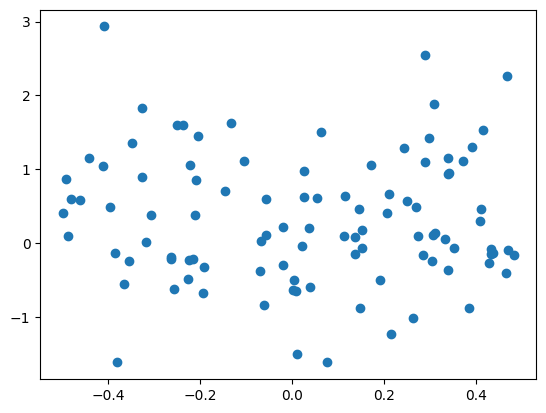

In [252]:
plt.scatter(x,y)

In [266]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(x[:80].reshape(-1,1) ,y[:80].reshape(-1,1))
u= dt.predict(x[80:].reshape(-1,1))
dt.score(y[80:].reshape(-1,1) ,u)

-1.2350578372419316

In [ ]:
#elastic net regression

In [291]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import ElasticNet,Ridge,Lasso,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [280]:
data= load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [286]:
df= pd.DataFrame(data= data.data, columns= data.feature_names)
df["target"]= data["target"]
#pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [289]:
x= df.drop("target", axis=1)
y= df["target"]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [296]:
#Linarregression
lr= LinearRegression()
lr.fit(x_train,y_train)
y_pred= lr.predict(x_test)
r2_score(y_test,y_pred)

0.4526027629719195

In [294]:
#ridge
ridge= Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
y_pred= ridge.predict(x_test)

r2_score(y_test,y_pred)

0.46085219464119265

In [295]:
#lasso
lasso= Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_pred= lasso.predict(x_test)
r2_score(y_test,y_pred)

0.4718547867276227

In [303]:
#elasticnet
elastic= ElasticNet(alpha=0.0051,l1_ratio= 0.9)
elastic.fit(x_train,y_train)
y_pred= elastic.predict(x_test)
r2_score(y_test,y_pred)

0.46189915707073226

In [304]:
#svm
from sklearn.datasets._samples_generator import make_circles
from sklearn.svm import SVR


In [354]:
x,y= make_circles(n_samples=100,noise=0.01, random_state=45)


In [348]:
y.shape

(100,)

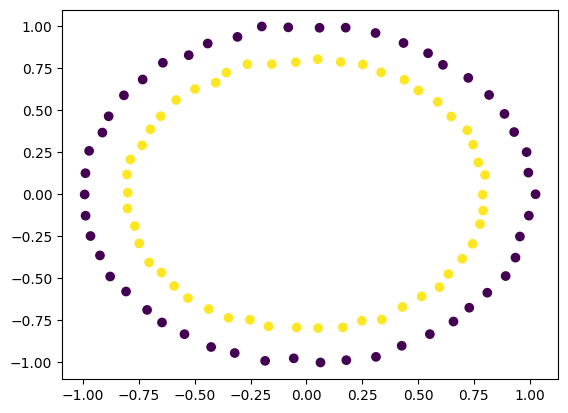

In [355]:
plt.scatter(x[:,0], x[:,1], c= y)

In [356]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [357]:
def plot_decision_regions(x,y,clf):
  x_min,x_max= x[:,0].min()-1,x[:,0].max()+1
  y_min,y_max= x[:,1].min()-1,x[:,1].max()+1
  xx,yy= np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
  Z= clf.predict(np.array([xx.ravel(),yy.ravel()]).T)
  Z= Z.reshape(xx.shape)
  plt.contourf(xx,yy,Z,alpha=0.4)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())
  for i,j in enumerate(np.unique(y)):
    plt.scatter(x[y==j,0],x[y==j,1],label=j)

  plt.legend()
  plt.show()

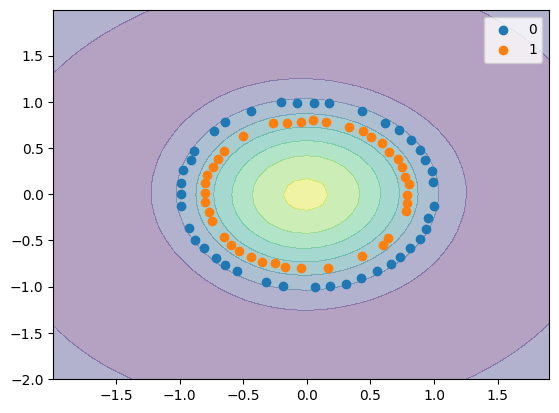

In [362]:
plot_decision_regions(x_train,y_train,clf=svc)

In [368]:

def plot_3d_decision_regions(x,y,clf):
  z= np.exp(-(x**2).sum(1))
  ax= plt.axes(projection="3d")
  ax.scatter3D(x[:,0],x[:,1], z, c=y, s=100)
  ax.set_xlabel("x1")
  ax.set_ylabel("x2")
  ax.set_zlabel("z")
  plt.show()

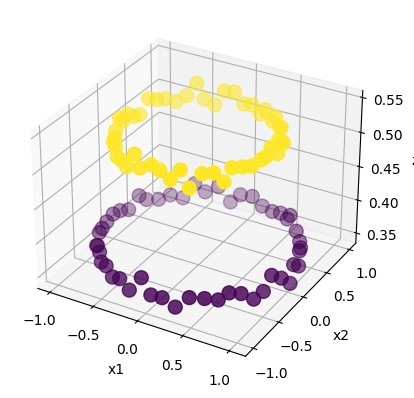

In [369]:
plot_3d_decision_regions(x,y,clf=svc)

In [375]:
np.exp(-(x**2).sum(0))     #x1 andx2 columwise
np.exp(-(x**2).sum(1))     #x1 rowwise
print(np.exp(-(x**2).sum(0)).shape)
np.exp(-(x**2).sum(1)).shape

(2,)


(100,)

In [361]:
svc= SVR(kernel="rbf")
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)
r2_score(y_test,y_pred)

0.9335111780012177

In [ ]:
#kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}

In [376]:
params= {"kernel":['linear','poly','rbf','sigmoid']}
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(SVR(),params,cv=2)
grid.fit(x_train,y_train)


GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [337]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute the RBF kernel matrix for training data
gamma = 0.5  # Example gamma value
K_train = rbf_kernel(X_train, X_train, gamma=gamma)

# Compute the RBF kernel matrix between training and test data
K_test = rbf_kernel(X_test, X_train, gamma=gamma)

# Train the SVM model using the precomputed kernel matrix
model = SVC(kernel='precomputed')
model.fit(K_train, y_train)

# Predict on the test set using the precomputed kernel matrix
y_pred = model.predict(K_test)

# Compute accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [340]:
K_train.shape

(105, 105)